In [234]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
D = 2000

In [236]:
# create an embedding
A = np.random.randn(D).astype(np.float32)
B = np.random.randn(D).astype(np.float32)
C = np.random.randn(D).astype(np.float32)

In [237]:
S = np.array([A, B, A, C], dtype=np.float32)
S.shape

(4, 2000)

In [238]:
# creat 4 positionnal embeddings
P = np.random.randn(4, D).astype(np.float32)
P

array([[-0.6871045 , -0.5265189 , -1.1763697 , ..., -1.1922396 ,
         0.2864224 ,  0.37809765],
       [-0.6780291 , -2.8960948 , -0.00590167, ..., -0.48370922,
        -0.43332705, -0.5131906 ],
       [ 0.37482762, -0.04958512,  1.12531   , ...,  0.7077039 ,
         1.0103481 ,  0.64210683],
       [-0.13741638, -0.13840501,  0.8328583 , ..., -0.356314  ,
         2.0302618 , -0.09051124]], dtype=float32)

In [239]:
(P[0].T).shape

(2000,)

In [240]:
X =  P +S

In [241]:
QK = (P[1].reshape(D, 1) @ P[0].reshape(1, D)) + (P[2].reshape(D, 1) @ P[1].reshape(1, D)) + (P[3].reshape(D, 1) @ P[2].reshape(1, D))
QK.shape

(2000, 2000)

In [242]:
print(X.shape)
print(QK.shape)

(4, 2000)
(2000, 2000)


In [243]:
# get attention matrix
Att = X @ QK @ (X.T)
Att.shape

(4, 4)

In [244]:
def softmax(x, axis=None):
    x_max = np.max(x, axis=axis, keepdims=True)
    e_x = np.exp(x - x_max)
    return e_x / np.sum(e_x, axis=axis, keepdims=True)


In [245]:
Att

array([[ 2.1535508e+03, -1.5062583e+05,  2.4885311e+05,  2.0304507e+03],
       [ 3.9945850e+06, -8.4350578e+04, -4.2068112e+05, -1.1703882e+05],
       [ 3.9232656e+03,  3.8571458e+06,  4.3904897e+05, -8.8446891e+04],
       [-2.5279227e+05,  5.0720797e+04,  4.0867830e+06, -1.4267277e+04]],
      dtype=float32)

In [246]:
Att = softmax(Att, axis=1)

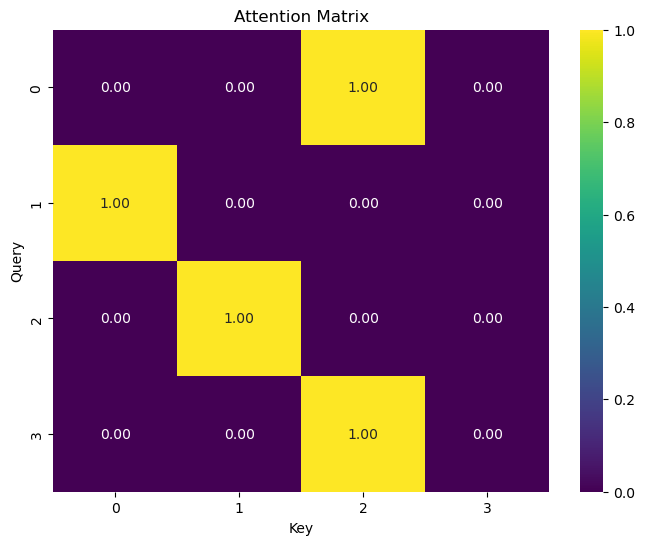

In [247]:
# plot the attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Att, annot=True, fmt=".2f", cmap="viridis")
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


In [248]:
V = np.random.randn(D, D).astype(np.float32)

In [249]:
Z = Att @ X @ V + X

In [250]:
QK2 = V.T @ A.reshape(D,1) @ P[2].reshape(1, D)

In [251]:
Att2 = Z @ QK2 @ (Z.T)

In [252]:
Att2 = softmax(Att2, axis=1)

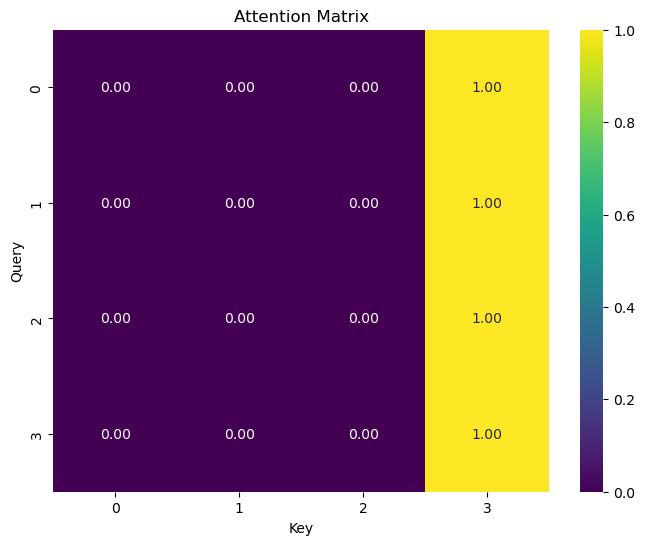

In [253]:
# plot the attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Att2, annot=True, fmt=".2f", cmap="viridis")
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()
